In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.constants import c
sys.path.append("../")


In [2]:
from pyACC.cosmology.distances import Distances

In [3]:
# Define parameters
H0 = 67.8  # km/s/Mpc
Omega_m = 0.308  # Densità di materia
Omega_lambda = 0.692  # Densità di energia oscura
""""
H0 = 70  # Hubble constant at z=0
Omega_m = 0.3  # Matter density parameter
Omega_lambda = 0.7  # Dark energy density parameter
"""
# Define redshift range
z = np.linspace(0, 3, 100)  # Redshift from 0 to 3
# Calculate Hubble function values

def hubble_function(z):
    return H0*np.sqrt(Omega_m*(1+z)**3 + Omega_lambda)
#H = hubble_function(z)




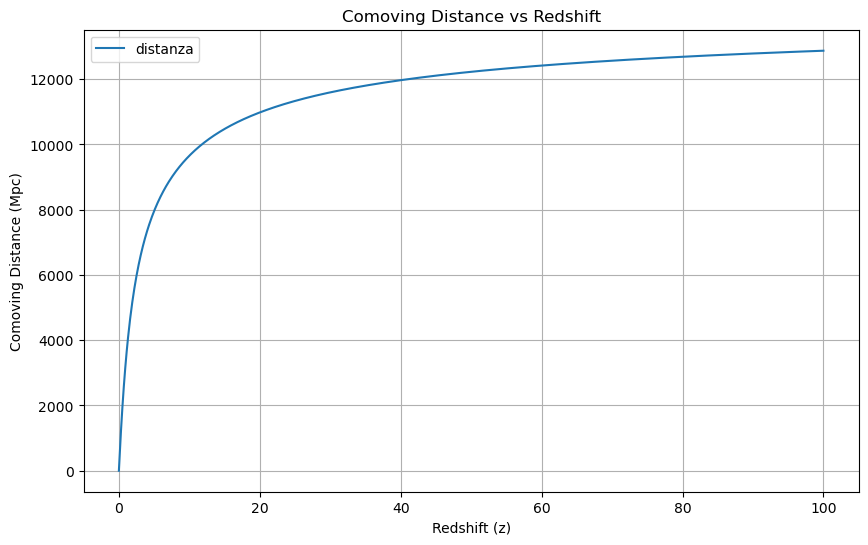

In [4]:
distance=Distances(hubble_function)
z_values = np.linspace(0, 100, 1000) 
dc= np.array([distance.comoving_distance(z) for z in z_values])
#plotto distanza comovente
plt.figure(figsize=(10, 6))
plt.plot(z_values,dc,label='distanza')
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Distance (Mpc)')
plt.title('Comoving Distance vs Redshift')
plt.legend()
plt.grid()
plt.show()



In [5]:
da = np.array([distance.angular_diameter_distance(z) for z in z_values])  # Calcolo per tutti i redshift

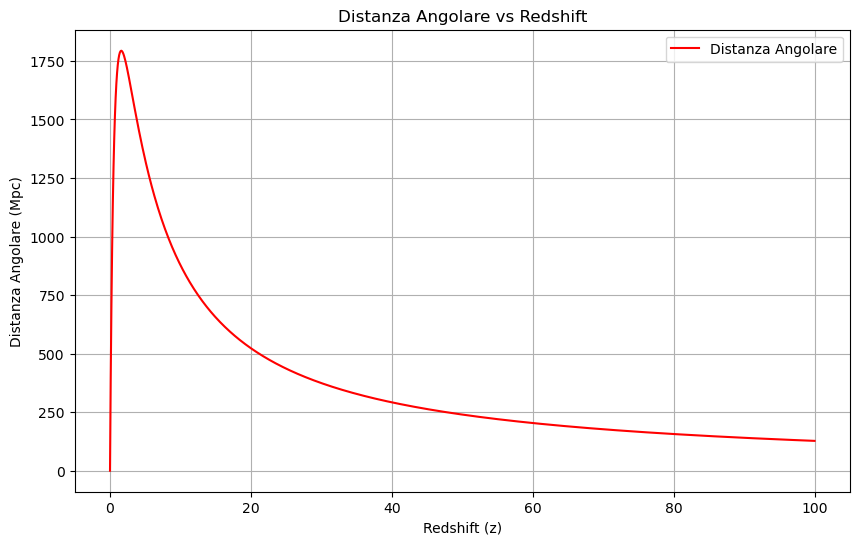

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, da, label='Distanza Angolare', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distanza Angolare (Mpc)')
plt.title('Distanza Angolare vs Redshift')
plt.legend()
plt.grid()
plt.show()

In [7]:
dh = np.array([distance.hubble_distance(z) for z in z_values])

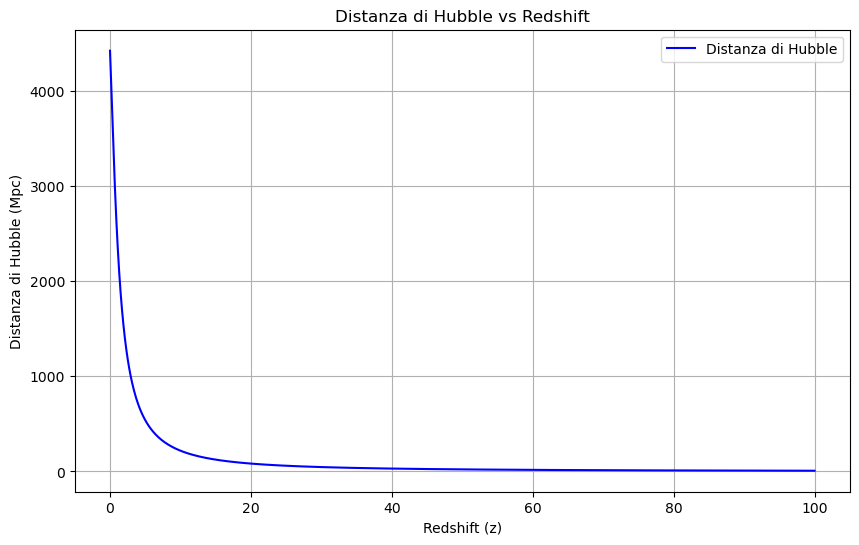

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, dh, label='Distanza di Hubble', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Distanza di Hubble (Mpc)')
plt.title('Distanza di Hubble vs Redshift')
plt.legend()
plt.grid()
plt.show()

In [9]:
dl = np.array([distance.luminosity_distance(z) for z in z_values])


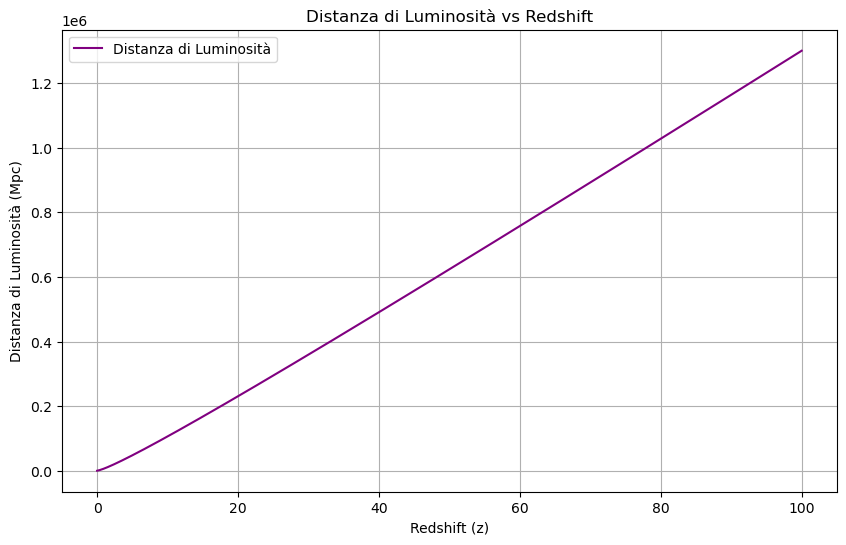

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, dl, label='Distanza di Luminosità', color='purple')
plt.xlabel('Redshift (z)')
plt.ylabel('Distanza di Luminosità (Mpc)')
plt.title('Distanza di Luminosità vs Redshift')
plt.legend()
plt.grid()
plt.show()

Voglio vedere se queste distanze che ho calcolato matchano quelle di astropy! TORNANO, UNICA CHE NON HO RICALCOLATO CON ASTROPY è QUELLA DI HUBBLE

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18  # Usa un modello cosmologico standard
from astropy import units as u

# Imposta il redshift massimo
z_max = 100
z_values = np.linspace(0, z_max, 1000)  # Genera valori di z da 0 a 100
z_values_astropy = z_values * u.dimensionless_unscaled  # Aggiungi l'unità di misura per Astropy

# Calcolare le distanze cosmologiche con Astropy
dc_astropy = Planck18.comoving_distance(z_values_astropy)  # Distanza comovente (in Mpc)
da_astropy = Planck18.angular_diameter_distance(z_values_astropy)  # Distanza angolare (in Mpc)
dl_astropy = Planck18.luminosity_distance(z_values_astropy)  # Distanza di luminosità (in Mpc)



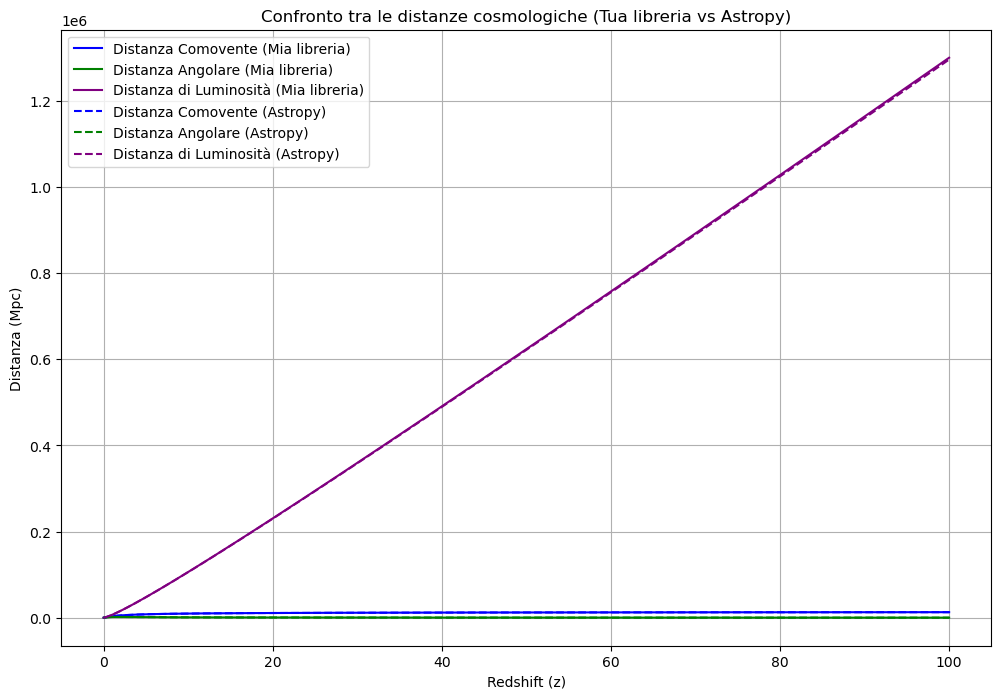

In [12]:
plt.figure(figsize=(12, 8))

# Plot delle distanze calcolate con la mia libreria
plt.plot(z_values, dc, label='Distanza Comovente (Mia libreria)', color='blue')
plt.plot(z_values, da, label='Distanza Angolare (Mia libreria)', color='green')
plt.plot(z_values, dl, label='Distanza di Luminosità (Mia libreria)', color='purple')

#plot delle distanze calcolate con Astropy
plt.plot(z_values_astropy, dc_astropy, label='Distanza Comovente (Astropy)', linestyle='--', color='blue')
plt.plot(z_values_astropy, da_astropy, label='Distanza Angolare (Astropy)', linestyle='--', color='green')
plt.plot(z_values, dl_astropy, label='Distanza di Luminosità (Astropy)', linestyle='--', color='purple')

# Aggiungere etichette e legenda
plt.xlabel('Redshift (z)')
plt.ylabel('Distanza (Mpc)')
plt.title('Confronto tra le distanze cosmologiche (Tua libreria vs Astropy)')
plt.legend()
plt.grid(True)

# Mostrare il grafico
plt.show()